In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam

import optuna


c:\Users\wesse\anaconda3\envs\tensorenv\lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.12.2 when it was built against 1.12.1, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
c:\Users\wesse\anaconda3\envs\tensorenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = pd.read_csv('WineQT.csv')
df = df.dropna()
df = df.drop(columns=['Id'])
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
# print column data types
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
print(df['quality'].value_counts())

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64


In [7]:
# convert Quality to a multi-class label
df['quality'] = pd.cut(df['quality'], bins=[0, 5, 6, 10], labels=['low', 'medium', 'high'])

In [8]:
print(df['quality'].value_counts())

quality
low       522
medium    462
high      159
Name: count, dtype: int64


In [9]:
train, test = train_test_split(df, test_size=0.2)
X_train, y_train = train.drop('quality', axis=1), train['quality']
X_test, y_test = test.drop('quality', axis=1), test['quality']

In [10]:
# create a model
model = keras.Sequential([
    keras.layers.Dense(11, activation='relu', input_shape=(11,)),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

In [11]:
# specify the optimizer, learning rate, loss function, and metrics
model.compile(Adam(learning_rate=0.005), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
# Encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Fit the model
history = model.fit(X_train, y_train_encoded, epochs=100, batch_size=8, validation_split=0.2)


Epoch 1/100
92/92 [==============================] - 1s 7ms/step - loss: 1.1881 - accuracy: 0.4241 - val_loss: 1.0780 - val_accuracy: 0.4699
Epoch 2/100
92/92 [==============================] - 0s 4ms/step - loss: 1.0395 - accuracy: 0.4761 - val_loss: 1.0266 - val_accuracy: 0.5082
Epoch 3/100
92/92 [==============================] - 0s 2ms/step - loss: 0.9836 - accuracy: 0.4911 - val_loss: 1.0783 - val_accuracy: 0.4863
Epoch 4/100
92/92 [==============================] - 0s 3ms/step - loss: 0.9957 - accuracy: 0.5144 - val_loss: 1.0609 - val_accuracy: 0.4317
Epoch 5/100
92/92 [==============================] - 0s 3ms/step - loss: 0.9413 - accuracy: 0.5431 - val_loss: 1.0816 - val_accuracy: 0.4918
Epoch 6/100
92/92 [==============================] - 0s 3ms/step - loss: 0.9632 - accuracy: 0.5185 - val_loss: 0.9841 - val_accuracy: 0.4645
Epoch 7/100
92/92 [==============================] - 0s 3ms/step - loss: 0.9399 - accuracy: 0.5445 - val_loss: 1.1243 - val_accuracy: 0.4317
Epoch 8/100
9

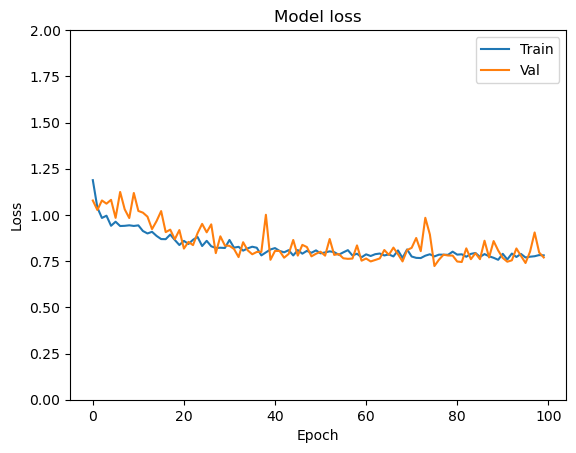

In [13]:
# Plot the training and validation loss with y-max of 2
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0, 2)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [14]:
# Evaluate the model using a confusion matrix and classification report
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test_encoded, y_pred)
print(classification_report(y_test_encoded, y_pred))
print(cm)

8/8 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.59      0.29      0.38        35
           1       0.70      0.50      0.58       103
           2       0.47      0.73      0.57        91

    accuracy                           0.55       229
   macro avg       0.59      0.50      0.51       229
weighted avg       0.59      0.55      0.55       229

[[10  1 24]
 [ 3 51 49]
 [ 4 21 66]]


# Optuna

In [15]:
# Define optuna objective function
def objective(trial):
    # Define the hyperparameters to optimize
    num_layers = trial.suggest_int('num_layers', 1, 3)
    num_neurons = trial.suggest_int('num_neurons', 8, 64)
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-2, log=True)
    batch_size = trial.suggest_int('batch_size', 8, 32)
    
    # Create the model
    model = keras.Sequential()
    model.add(keras.layers.Dense(11, activation='relu', input_shape=(11,)))
    
    for i in range(num_layers):
        model.add(keras.layers.Dense(num_neurons, activation='relu'))
    
    model.add(keras.layers.Dense(3, activation='softmax'))
    
    # Compile the model
    model.compile(Adam(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    # Fit the model
    model.fit(X_train, y_train_encoded, epochs=100, batch_size=batch_size, validation_split=0.2, verbose=0)
    
    # Evaluate the model
    _, accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)
    
    return accuracy

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2024-09-30 15:26:07,563] A new study created in memory with name: no-name-1e94157a-9f31-4d14-8367-2bb676e72821
[I 2024-09-30 15:26:20,104] Trial 0 finished with value: 0.5371178984642029 and parameters: {'num_layers': 1, 'num_neurons': 47, 'learning_rate': 0.0005553245249404003, 'batch_size': 25}. Best is trial 0 with value: 0.5371178984642029.
[I 2024-09-30 15:26:32,075] Trial 1 finished with value: 0.5938864350318909 and parameters: {'num_layers': 2, 'num_neurons': 53, 'learning_rate': 0.0028046973930300214, 'batch_size': 29}. Best is trial 1 with value: 0.5938864350318909.
[I 2024-09-30 15:26:54,835] Trial 2 finished with value: 0.5458515286445618 and parameters: {'num_layers': 2, 'num_neurons': 58, 'learning_rate': 0.00010847308626317067, 'batch_size': 11}. Best is trial 1 with value: 0.5938864350318909.
[I 2024-09-30 15:27:13,332] Trial 3 finished with value: 0.5938864350318909 and parameters: {'num_layers': 1, 'num_neurons': 58, 'learning_rate': 0.001040070833645419, 'batch_si

In [19]:
# train a model on the best study trial
trial = study.best_trial
model = keras.Sequential()
model.add(keras.layers.Dense(11, activation='relu', input_shape=(11,)))
for i in range(trial.params['num_layers']):
    model.add(keras.layers.Dense(trial.params['num_neurons'], activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))
model.compile(Adam(learning_rate=trial.params['learning_rate']), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train_encoded, epochs=200, batch_size=trial.params['batch_size'], validation_split=0.2)

Epoch 1/200
41/41 [==============================] - 1s 9ms/step - loss: 1.6358 - accuracy: 0.4213 - val_loss: 1.1030 - val_accuracy: 0.4153
Epoch 2/200
41/41 [==============================] - 0s 3ms/step - loss: 0.9733 - accuracy: 0.5116 - val_loss: 1.0370 - val_accuracy: 0.4590
Epoch 3/200
41/41 [==============================] - 0s 3ms/step - loss: 0.9627 - accuracy: 0.5144 - val_loss: 1.0345 - val_accuracy: 0.4699
Epoch 4/200
41/41 [==============================] - 0s 3ms/step - loss: 0.9532 - accuracy: 0.5280 - val_loss: 1.0359 - val_accuracy: 0.4372
Epoch 5/200
41/41 [==============================] - 0s 3ms/step - loss: 0.9728 - accuracy: 0.5267 - val_loss: 1.0177 - val_accuracy: 0.4809
Epoch 6/200
41/41 [==============================] - 0s 3ms/step - loss: 0.9598 - accuracy: 0.5280 - val_loss: 1.0536 - val_accuracy: 0.4481
Epoch 7/200
41/41 [==============================] - 0s 3ms/step - loss: 0.9574 - accuracy: 0.5253 - val_loss: 1.0009 - val_accuracy: 0.4918
Epoch 8/200
4

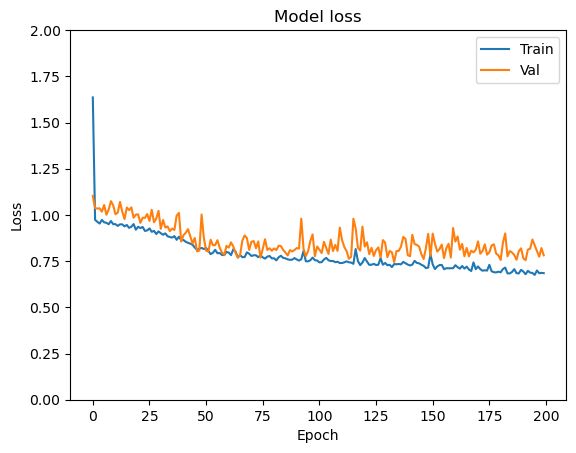

In [20]:
# plot the model loss over epochs with a y-max of 2
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0, 2)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [21]:
# print the classification report and confusion matrix
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test_encoded, y_pred)
print(classification_report(y_test_encoded, y_pred))
print(cm)

8/8 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.65      0.31      0.42        35
           1       0.72      0.61      0.66       103
           2       0.51      0.70      0.59        91

    accuracy                           0.60       229
   macro avg       0.63      0.54      0.56       229
weighted avg       0.63      0.60      0.60       229

[[11  0 24]
 [ 3 63 37]
 [ 3 24 64]]


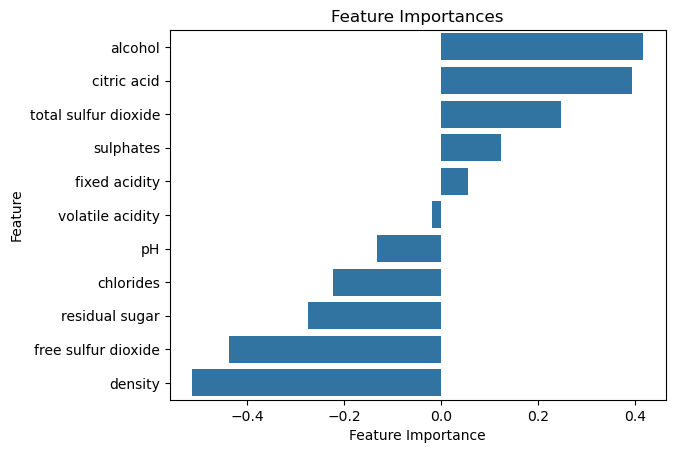

In [23]:
# plot the feature importances
feature_importances = model.layers[0].get_weights()[0]
feature_importances = pd.Series(feature_importances[0], index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()